### 6. Robust Regression
* Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.
* Three techniques supported by scikit - RANSAC, Theil Sen and HuberRegressor

#### Comparisions RANSAC, Theil Sen, HuberRegressor
* HuberRegressor should be faster than RANSAC 
* Theil Sen and RANSAC are unlikely to be as robust as HuberRegressor for the default parameters.
* RANSAC will deal better with large outliers in the y direction
* RANSAC is faster than Theil Sen and scales much better with the number of samples
* RANSAC is a good default option

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_regression

n_samples = 1000
n_outliers = 50
X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [5]:
from sklearn.linear_model import LinearRegression,RANSACRegressor

In [6]:
lr = LinearRegression()
lr.fit(X, y)
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

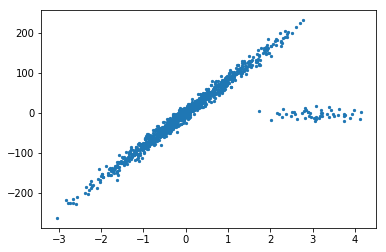

In [7]:
plt.scatter(X,y,s=5)